In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [6]:
earthquakes = pd.read_csv('all_month.csv')
earthquakes.head()

,time,latitude,longitude,depth,mag,magType,nst,gap,dmin,rms,...,updated,place,type,horizontalError,depthError,magError,magNst,status,locationSource,magSource
0,2021-11-30T12:18:16.030Z,38.833000,-122.805000,1.97,1.44,md,31.0,50.0,0.01038,0.02,...,2021-11-30T12:21:30.201Z,"7km W of Cobb, CA",earthquake,0.17,0.31,0.13,7.0,automatic,nc,nc
1,2021-11-30T12:17:42.360Z,38.834835,-122.805168,1.98,0.22,md,13.0,61.0,0.01205,0.01,...,2021-11-30T12:19:17.907Z,"7km WNW of Cobb, CA",earthquake,0.32,0.72,0.14,2.0,automatic,nc,nc
2,2021-11-30T11:50:23.770Z,19.332834,-155.099503,1.63,1.87,md,30.0,164.0,NaN,0.30,...,2021-11-30T11:53:40.990Z,"15 km SSE of Fern Forest, Hawaii",earthquake,0.63,0.64,0.94,12.0,automatic,hv,hv
3,2021-11-30T11:37:13.280Z,17.979500,-67.004000,10.00,2.70,md,20.0,155.0,0.04150,0.15,...,2021-11-30T11:52:24.629Z,"4 km E of La Parguera, Puerto Rico",earthquake,0.45,0.59,0.16,10.0,reviewed,pr,pr
4,2021-11-30T11:33:05.650Z,38.835167,-122.805168,1.78,0.85,md,10.0,77.0,0.01202,0.01,...,2021-11-30T11:34:42.006Z,"7km WNW of Cobb, CA",earthquake,0.32,1.04,NaN,1.0,automatic,nc,nc


Notes: Using groupby on Type (Earthquake, Explosions, Ice quake, Quarry Blast?), groupby Location then place, Magnitudes bigger than or equal to 5. Questions: Which locations are hit by (event) most frequently? What time (window) do the events most often occur? What is relationship between time of day and an event occuring? Are there any predictors/strong relationships/indicators that an event is going to occur? Average magnitude per event compared?

In [7]:
earthquakes.describe()

,latitude,longitude,depth,mag,nst,gap,dmin,rms,horizontalError,depthError,magError,magNst
count,9134.000000,9134.000000,9134.000000,9133.000000,6564.000000,7580.000000,6370.000000,9133.000000,6740.000000,9133.000000,6993.000000,7577.000000
mean,36.529624,-112.178530,22.755205,1.675445,21.284126,116.696895,0.660005,0.275026,1.676261,2.276648,0.327450,14.108618
std,19.612662,63.009157,53.944145,1.221161,15.674889,58.743783,2.292870,0.288512,3.008785,9.457025,0.601628,26.664414
min,-62.624300,-179.967300,-7.300000,-1.210000,0.000000,12.000000,0.000000,0.000000,0.080000,0.000000,0.000000,0.000000
25%,33.318542,-149.782175,3.152500,0.850000,10.000000,72.000000,0.019095,0.090000,0.280000,0.470000,0.110000,4.000000
50%,38.168950,-121.142751,8.305000,1.480000,16.000000,103.000000,0.063889,0.150000,0.490000,0.780000,0.170000,8.000000
75%,44.980667,-116.000975,19.200000,2.100000,28.000000,151.000000,0.175900,0.397600,0.935134,1.570000,0.264000,15.000000
max,85.862200,179.941000,632.600000,7.500000,221.000000,354.680000,35.610000,2.910000,20.600000,751.600000,5.470000,593.000000


In [8]:
earthquakes.isnull().sum()

time                  0
latitude              0
longitude             0
depth                 0
mag                   1
magType               1
nst                2570
gap                1554
dmin               2764
rms                   1
net                   0
id                    0
updated               0
place                 0
type                  0
horizontalError    2394
depthError            1
magError           2141
magNst             1557
status                0
locationSource        0
magSource             0
dtype: int64

<AxesSubplot:>

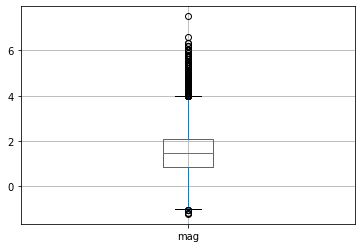

In [9]:
fg, ax = plt.subplots()
earthquakes.boxplot(column='mag', ax=ax)